In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
training_data = pd.read_csv('training_set_features.csv')
labels = pd.read_csv('training_set_labels.csv')

In [3]:
numeric_columns = training_data.select_dtypes('number').columns

In [4]:
category_columns = ['race', 'sex', 
       'marital_status', 'rent_or_own',  'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation']

In [5]:
ordinal_columns = ['age_group', 'education',  'income_poverty',
        'employment_status']

In [6]:
# IMPUTING THE MISSING VALUES

In [7]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'unemployed_occupation'


In [8]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Unemployed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'unemployed_in_industry'
        

In [9]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
       training_data.loc[i, 'employment_industry'] = 'Not_in_laborforce'


In [10]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Not in Labor Force")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'Not_in_laborforce'
        

In [11]:
for i, row in training_data[training_data['employment_industry'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_industry'] = 'other_industry'
        

In [12]:
for i, row in training_data[training_data['employment_occupation'].isna()].iterrows():
    conditions = (training_data["employment_status"]=="Employed")
    if conditions.any():
        training_data.loc[i, 'employment_occupation'] = 'other_occupation'
        

In [13]:
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_refused'
education_nan = 'refused_or_unknown'


training_data['income_poverty'].fillna(income_poverty_nan, inplace=True)
training_data['marital_status'].fillna(marital_status_nan, inplace=True)
training_data['employment_status'].fillna(employment_status_nan, inplace=True)
training_data['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
training_data['education'].fillna(education_nan, inplace=True)

In [14]:
def missing_count(training_data): # Creating a function which returns the values which is above zero
    
    count_nan = training_data.isnull().sum()
    count_nan = count_nan[count_nan > 0].sort_values()    # To sort down the values
    
    return count_nan

In [15]:
missing_counts_as_nan = missing_count(training_data)

In [16]:
missing_counts_as_nan

behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_antiviral_meds         71
behavioral_outside_home           82
behavioral_large_gatherings       87
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_touch_face            128
behavioral_avoidance             208
household_adults                 249
household_children               249
opinion_h1n1_risk                388
opinion_h1n1_vacc_effective      391
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
health_worker                    804
child_under_6_months             820
chronic_med_condition            971
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
health_insurance               12274
dtype: int64

In [17]:
# GOOD TO GO - Now start encoding the columns

In [18]:
training_data[ordinal_columns]

,age_group,education,income_poverty,employment_status
0,55 - 64 Years,< 12 Years,Below Poverty,Not in Labor Force
1,35 - 44 Years,12 Years,Below Poverty,Employed
2,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
3,65+ Years,12 Years,Below Poverty,Not in Labor Force
4,45 - 54 Years,Some College,"<= $75,000, Above Poverty",Employed
...,...,...,...,...
26702,65+ Years,Some College,"<= $75,000, Above Poverty",Not in Labor Force
26703,18 - 34 Years,College Graduate,"<= $75,000, Above Poverty",Employed
26704,55 - 64 Years,Some College,refused_or_unknown,refused_or_other_category
26705,18 - 34 Years,Some College,"<= $75,000, Above Poverty",Employed


In [19]:
training_data['overall_behaviour_of_respondent'] = training_data['behavioral_antiviral_meds'] + \
training_data['behavioral_avoidance'] + training_data['behavioral_face_mask'] + \
training_data['behavioral_wash_hands'] + training_data['behavioral_large_gatherings'] + \
training_data['behavioral_outside_home'] + training_data['behavioral_touch_face']

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for features in ordinal_columns:
    training_data[features] = le.fit_transform(training_data[features])

In [21]:
training_data = pd.get_dummies(training_data, columns=category_columns, drop_first=True)

In [22]:
training_data.drop(['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask',\
                    'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home',\
                    'behavioral_touch_face'], axis=1, inplace=True)

In [23]:
final_training_data = pd.merge(training_data, labels, on='respondent_id')

In [24]:
label1 = final_training_data['h1n1_vaccine']
label2 = final_training_data['seasonal_vaccine']

In [25]:
final_training_data.drop('respondent_id', axis=1, inplace=True)

In [26]:
data = final_training_data.drop(['h1n1_vaccine','seasonal_vaccine'], axis=1)

In [27]:
data.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unemployed_occupation,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,...,0,0,0,1,0,0,0,0,0,0
1,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,1.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.metrics import classification_report

In [29]:
import optuna

In [30]:
from optuna import visualization

In [31]:
from optuna.samplers import TPESampler

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, label1, test_size=0.2, random_state=101)

# Define the objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
    }
    
    xgb = XGBClassifier(**param, missing= np.nan)
    #early_stopping_rounds=10,
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label1, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max() #scores['test-AUC-mean'].max()
    return AUC

In [34]:
study1 = optuna.create_study(direction='maximize', sampler=TPESampler())
study1.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-03 16:14:24,098] A new study created in memory with name: no-name-0e321597-5ce3-4981-975e-ca3d6d112d5b
/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-03 16:15:42,259] Trial 0 finished with value: 0.7999165119763807 and parameters: {'n_estimators': 300, 'max_depth': 7, 'reg_alpha': 0.8773562666634352, 'reg_lambda': 0.9199621051353177, 'min_child_weight': 5, 'gamma': 0.38684425725798477, 'learning_rate': 0.6575615992927192, 'colsample_bytree': 0.625272088116187, 'subsample': 0.4806230832318828}. Best is trial 0 with value: 0.7999165119763807.
[I 2023-05-03 16:16:45,127] Trial 1 finished with value: 0.8184194075741529 and parameters: {'n_estimators': 177, 'max_depth': 9, 'reg_alpha': 0.20219852128470234, 'reg_lambda': 0.7430770841814468, 'min_child_weight': 0, 'gamma': 0.6345682232835909, 'learning_rate': 0.5709660282923344, 'colsample_bytree': 0.4214127587172648, 'subsample': 0.6393435228243873}. Best is trial 1 with value: 0.8184194075741529.
[I 2023-05-03 16:17:28,224] Trial 2 finished with value: 0.8530140975457119 and parameters: {'n_estimators': 202, 'max_depth': 6, 'reg_alpha': 0.3679111710707274, 'reg_lambda': 0.3493

[I 2023-05-03 16:33:55,141] Trial 20 finished with value: 0.8701356429654126 and parameters: {'n_estimators': 283, 'max_depth': 4, 'reg_alpha': 0.538390508255052, 'reg_lambda': 0.4036050840157506, 'min_child_weight': 3, 'gamma': 0.31265263610360583, 'learning_rate': 0.10940637643491287, 'colsample_bytree': 0.35894876605202675, 'subsample': 0.6789422487993617}. Best is trial 13 with value: 0.8701916497071338.
[I 2023-05-03 16:34:26,795] Trial 21 finished with value: 0.8699515550787987 and parameters: {'n_estimators': 274, 'max_depth': 4, 'reg_alpha': 0.519661173929402, 'reg_lambda': 0.4240930164766173, 'min_child_weight': 3, 'gamma': 0.3045529055564023, 'learning_rate': 0.11061891656514104, 'colsample_bytree': 0.3617960382760117, 'subsample': 0.6765748536039391}. Best is trial 13 with value: 0.8701916497071338.
[I 2023-05-03 16:35:00,626] Trial 22 finished with value: 0.8686674422318991 and parameters: {'n_estimators': 283, 'max_depth': 4, 'reg_alpha': 0.5630969255880771, 'reg_lambda': 

[I 2023-05-03 16:45:44,211] Trial 40 finished with value: 0.8620347271162323 and parameters: {'n_estimators': 160, 'max_depth': 7, 'reg_alpha': 0.5872911875583402, 'reg_lambda': 0.8541894028049335, 'min_child_weight': 1, 'gamma': 0.4442331298390318, 'learning_rate': 0.15457399943110803, 'colsample_bytree': 0.4750127240750106, 'subsample': 0.7735140759239616}. Best is trial 32 with value: 0.8709596897165038.
[I 2023-05-03 16:46:17,934] Trial 41 finished with value: 0.8704894331721829 and parameters: {'n_estimators': 214, 'max_depth': 5, 'reg_alpha': 0.6231685033869574, 'reg_lambda': 0.9989886007614988, 'min_child_weight': 2, 'gamma': 0.3502785546623632, 'learning_rate': 0.05635109441829698, 'colsample_bytree': 0.4371009103708372, 'subsample': 0.7283889515330051}. Best is trial 32 with value: 0.8709596897165038.
[I 2023-05-03 16:46:54,305] Trial 42 finished with value: 0.871017031791812 and parameters: {'n_estimators': 235, 'max_depth': 5, 'reg_alpha': 0.6980100123980495, 'reg_lambda': 0

[I 2023-05-03 16:58:25,252] Trial 60 finished with value: 0.8699453756936878 and parameters: {'n_estimators': 172, 'max_depth': 5, 'reg_alpha': 0.6582072593162538, 'reg_lambda': 0.9670554636156001, 'min_child_weight': 2, 'gamma': 0.5201545295596272, 'learning_rate': 0.1282531740285005, 'colsample_bytree': 0.3917229632805869, 'subsample': 0.793261681104817}. Best is trial 44 with value: 0.8711617263914759.
[I 2023-05-03 16:58:58,259] Trial 61 finished with value: 0.8705971252130643 and parameters: {'n_estimators': 204, 'max_depth': 5, 'reg_alpha': 0.6425684493403797, 'reg_lambda': 0.9961775754947367, 'min_child_weight': 1, 'gamma': 0.3955836356393927, 'learning_rate': 0.06079830428510223, 'colsample_bytree': 0.43089569172300096, 'subsample': 0.6991485777239542}. Best is trial 44 with value: 0.8711617263914759.
[I 2023-05-03 16:59:24,597] Trial 62 finished with value: 0.8688895616470393 and parameters: {'n_estimators': 199, 'max_depth': 4, 'reg_alpha': 0.7512993646078046, 'reg_lambda': 0

[I 2023-05-03 17:12:33,700] Trial 80 finished with value: 0.8642811721581396 and parameters: {'n_estimators': 173, 'max_depth': 6, 'reg_alpha': 0.7398213607223499, 'reg_lambda': 0.8839149997665586, 'min_child_weight': 4, 'gamma': 0.4349837612358972, 'learning_rate': 0.012117166237458475, 'colsample_bytree': 0.4914296059058498, 'subsample': 0.7402175961940437}. Best is trial 75 with value: 0.8711990513176435.
[I 2023-05-03 17:13:28,566] Trial 81 finished with value: 0.8709279948692128 and parameters: {'n_estimators': 217, 'max_depth': 7, 'reg_alpha': 0.5789690236063808, 'reg_lambda': 0.921707960817372, 'min_child_weight': 2, 'gamma': 0.5116136933463306, 'learning_rate': 0.038683013386787646, 'colsample_bytree': 0.4558803484428513, 'subsample': 0.7083520607136279}. Best is trial 75 with value: 0.8711990513176435.
[I 2023-05-03 17:14:29,469] Trial 82 finished with value: 0.8712632761172066 and parameters: {'n_estimators': 218, 'max_depth': 7, 'reg_alpha': 0.5478007582642769, 'reg_lambda':

[I 2023-05-03 17:33:58,064] Trial 100 finished with value: 0.8668513343785978 and parameters: {'n_estimators': 258, 'max_depth': 6, 'reg_alpha': 0.7638320516202208, 'reg_lambda': 0.8982628481140137, 'min_child_weight': 2, 'gamma': 0.42600967298612463, 'learning_rate': 0.011222389036540142, 'colsample_bytree': 0.5301907290128299, 'subsample': 0.6312609184982771}. Best is trial 88 with value: 0.8712978453542073.
[I 2023-05-03 17:34:53,439] Trial 101 finished with value: 0.8707725880946091 and parameters: {'n_estimators': 220, 'max_depth': 7, 'reg_alpha': 0.5874387256695203, 'reg_lambda': 0.9297496652149365, 'min_child_weight': 2, 'gamma': 0.5099685336289942, 'learning_rate': 0.04350778067994518, 'colsample_bytree': 0.45525918919444147, 'subsample': 0.7110983777988569}. Best is trial 88 with value: 0.8712978453542073.
[I 2023-05-03 17:35:45,084] Trial 102 finished with value: 0.8705299999760066 and parameters: {'n_estimators': 193, 'max_depth': 7, 'reg_alpha': 0.6401195738914388, 'reg_lam

In [35]:
study1.best_trial

FrozenTrial(number=88, state=TrialState.COMPLETE, values=[0.8712978453542073], datetime_start=datetime.datetime(2023, 5, 3, 17, 20, 7, 90638), datetime_complete=datetime.datetime(2023, 5, 3, 17, 21, 14, 331920), params={'n_estimators': 254, 'max_depth': 7, 'reg_alpha': 0.6880848993680609, 'reg_lambda': 0.8389531954992305, 'min_child_weight': 2, 'gamma': 0.5371949694878599, 'learning_rate': 0.03069730987296773, 'colsample_bytree': 0.45946717137309584, 'subsample': 0.6892257506988365}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'reg_alpha': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'reg_lambda': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'min_child_weight': IntDistribution(high=6, log=False, low=0, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=1e-08, step=None), 'learning_ra

In [36]:
# 43 - best trial

In [37]:
param_h1n1 = study1.best_params

In [38]:
param_h1n1

{'n_estimators': 254,
 'max_depth': 7,
 'reg_alpha': 0.6880848993680609,
 'reg_lambda': 0.8389531954992305,
 'min_child_weight': 2,
 'gamma': 0.5371949694878599,
 'learning_rate': 0.03069730987296773,
 'colsample_bytree': 0.45946717137309584,
 'subsample': 0.6892257506988365}

In [39]:
study1.pruner

In [40]:
X_train_h1, X_test_h1, y_train_h1, y_test_h1 = train_test_split(data, label1, test_size=0.2, random_state=101)

In [41]:
h1n1_model = XGBClassifier(**param_h1n1,missing= np.nan)

In [42]:
h1n1_model.fit(X_train_h1, y_train_h1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.45946717137309584, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5371949694878599, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03069730987296773, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=254, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
h1n1_predict = h1n1_model.predict(X_test_h1)

In [44]:
print(classification_report(y_test_h1, h1n1_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4199
           1       0.76      0.49      0.60      1143

    accuracy                           0.86      5342
   macro avg       0.81      0.72      0.75      5342
weighted avg       0.85      0.86      0.85      5342



/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


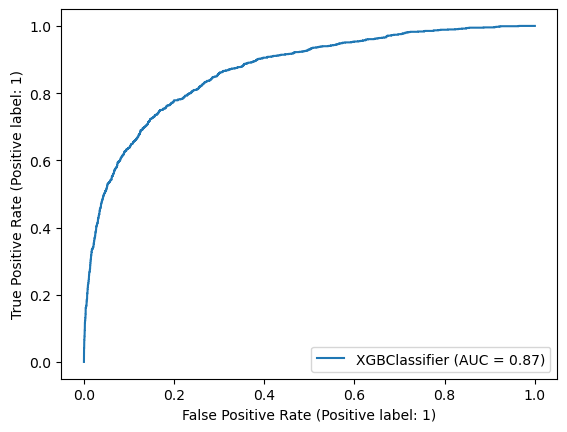

In [45]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(h1n1_model, X_test_h1, y_test_h1)

In [46]:
label1.shape

(26707,)

In [47]:
X_train.shape

(21365, 84)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(data, label2, test_size=0.2, random_state=101)

# Define the objective function
def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 6),
        'gamma': trial.suggest_float('gamma',1e-8, 1.0),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 0.8),
        'subsample': trial.suggest_float('subsample', 0.3, 0.8),
        #'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0, 10)
      #'custom_metric' : ['AUC'],
    }
    
    xgb = XGBClassifier(**param, missing= np.nan)
    
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(xgb, data, label2, cv=5, scoring='roc_auc')
    AUC = np.mean(scores).max()
    return AUC

In [49]:
study2 = optuna.create_study(direction='maximize', sampler=TPESampler())
study2.optimize(objective, n_trials=120, show_progress_bar=True)

[I 2023-05-03 17:53:02,032] A new study created in memory with name: no-name-c73f1321-1da8-4a7c-a278-fa30ce91156a
/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/optuna/progress_bar.py:56: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/120 [00:00<?, ?it/s]

[I 2023-05-03 17:53:37,206] Trial 0 finished with value: 0.8617868042913486 and parameters: {'n_estimators': 429, 'max_depth': 4, 'reg_alpha': 0.23069882551241497, 'reg_lambda': 0.23760758178680516, 'min_child_weight': 5, 'gamma': 0.5227786334247114, 'learning_rate': 0.12954380330879206, 'colsample_bytree': 0.40309819885303083, 'subsample': 0.7054760551315302}. Best is trial 0 with value: 0.8617868042913486.
[I 2023-05-03 17:54:04,451] Trial 1 finished with value: 0.8197874126991916 and parameters: {'n_estimators': 133, 'max_depth': 10, 'reg_alpha': 0.52402843701393, 'reg_lambda': 0.6350943618540265, 'min_child_weight': 2, 'gamma': 0.9226870192667204, 'learning_rate': 0.5987511841592607, 'colsample_bytree': 0.5152622643023447, 'subsample': 0.7896450797763668}. Best is trial 0 with value: 0.8617868042913486.
[I 2023-05-03 17:55:23,981] Trial 2 finished with value: 0.8621289187977 and parameters: {'n_estimators': 493, 'max_depth': 9, 'reg_alpha': 0.1312924091805621, 'reg_lambda': 0.35991

[I 2023-05-03 18:04:42,763] Trial 20 finished with value: 0.8471105745961556 and parameters: {'n_estimators': 428, 'max_depth': 4, 'reg_alpha': 0.07089991497114317, 'reg_lambda': 0.12429113518588494, 'min_child_weight': 3, 'gamma': 0.55885118451095, 'learning_rate': 0.2639411793074869, 'colsample_bytree': 0.5597359642695525, 'subsample': 0.4922316361014329}. Best is trial 12 with value: 0.8643174837436973.
[I 2023-05-03 18:05:31,116] Trial 21 finished with value: 0.86446551118968 and parameters: {'n_estimators': 499, 'max_depth': 8, 'reg_alpha': 0.13969629823358043, 'reg_lambda': 0.32331848494626375, 'min_child_weight': 3, 'gamma': 0.015766714504431567, 'learning_rate': 0.01884460362652518, 'colsample_bytree': 0.4689092453405598, 'subsample': 0.36551174681246174}. Best is trial 21 with value: 0.86446551118968.
[I 2023-05-03 18:06:10,139] Trial 22 finished with value: 0.8512763846551568 and parameters: {'n_estimators': 447, 'max_depth': 7, 'reg_alpha': 0.18425896448543821, 'reg_lambda':

[I 2023-05-03 18:25:07,084] Trial 40 finished with value: 0.8163042660035117 and parameters: {'n_estimators': 426, 'max_depth': 9, 'reg_alpha': 0.37401442620936165, 'reg_lambda': 0.08397946525399044, 'min_child_weight': 2, 'gamma': 0.07424374341148154, 'learning_rate': 0.2994870051019253, 'colsample_bytree': 0.5146772642569408, 'subsample': 0.4224317223369901}. Best is trial 25 with value: 0.8647429341577118.
[I 2023-05-03 18:25:51,562] Trial 41 finished with value: 0.8467468301593263 and parameters: {'n_estimators': 500, 'max_depth': 8, 'reg_alpha': 0.035374742502251866, 'reg_lambda': 0.3307977137345009, 'min_child_weight': 6, 'gamma': 0.05049312654542958, 'learning_rate': 0.109588643852408, 'colsample_bytree': 0.4507310744580495, 'subsample': 0.4319995462196367}. Best is trial 25 with value: 0.8647429341577118.
[I 2023-05-03 18:26:25,181] Trial 42 finished with value: 0.8596106218623134 and parameters: {'n_estimators': 472, 'max_depth': 7, 'reg_alpha': 0.1266525489364282, 'reg_lambda

[I 2023-05-03 19:27:39,414] Trial 60 finished with value: 0.8562669141149778 and parameters: {'n_estimators': 347, 'max_depth': 5, 'reg_alpha': 0.32498788536855044, 'reg_lambda': 0.3153750434575339, 'min_child_weight': 5, 'gamma': 0.273284001092613, 'learning_rate': 0.12573309208610414, 'colsample_bytree': 0.4813239863603739, 'subsample': 0.3022150289634474}. Best is trial 25 with value: 0.8647429341577118.
[I 2023-05-03 19:27:48,741] Trial 61 finished with value: 0.8636621641802769 and parameters: {'n_estimators': 297, 'max_depth': 3, 'reg_alpha': 0.08655642818035897, 'reg_lambda': 0.3372421878487387, 'min_child_weight': 6, 'gamma': 0.15526856804168962, 'learning_rate': 0.05416314511041649, 'colsample_bytree': 0.5051480624278953, 'subsample': 0.341896994663811}. Best is trial 25 with value: 0.8647429341577118.
[I 2023-05-03 19:35:17,043] Trial 62 finished with value: 0.8628816757081017 and parameters: {'n_estimators': 374, 'max_depth': 4, 'reg_alpha': 0.011623883485467699, 'reg_lambda

[I 2023-05-03 19:42:44,951] Trial 80 finished with value: 0.8608228828441703 and parameters: {'n_estimators': 433, 'max_depth': 5, 'reg_alpha': 0.40917215176587635, 'reg_lambda': 0.22310211170825928, 'min_child_weight': 1, 'gamma': 0.1387866023041437, 'learning_rate': 0.07096424828681536, 'colsample_bytree': 0.5532924650379474, 'subsample': 0.34342147657753236}. Best is trial 77 with value: 0.8649586381405883.
[I 2023-05-03 19:43:06,002] Trial 81 finished with value: 0.8637182648325448 and parameters: {'n_estimators': 488, 'max_depth': 4, 'reg_alpha': 0.2342936039006024, 'reg_lambda': 0.18880065659430023, 'min_child_weight': 3, 'gamma': 0.11039724530732473, 'learning_rate': 0.05387026735341028, 'colsample_bytree': 0.5064703711758507, 'subsample': 0.3154357406707991}. Best is trial 77 with value: 0.8649586381405883.
[I 2023-05-03 19:43:26,024] Trial 82 finished with value: 0.8647569598833389 and parameters: {'n_estimators': 470, 'max_depth': 4, 'reg_alpha': 0.3309913561570973, 'reg_lamb

[I 2023-05-03 19:55:02,960] Trial 100 finished with value: 0.8650110571868727 and parameters: {'n_estimators': 417, 'max_depth': 6, 'reg_alpha': 0.16422122380876875, 'reg_lambda': 0.23936478916808254, 'min_child_weight': 3, 'gamma': 0.29841285827872294, 'learning_rate': 0.030151399152247575, 'colsample_bytree': 0.434259046751504, 'subsample': 0.3687855919392019}. Best is trial 97 with value: 0.8651864738422184.
[I 2023-05-03 19:55:31,280] Trial 101 finished with value: 0.8653422195792684 and parameters: {'n_estimators': 412, 'max_depth': 6, 'reg_alpha': 0.1587544079131189, 'reg_lambda': 0.23595441891067534, 'min_child_weight': 3, 'gamma': 0.2560220676776254, 'learning_rate': 0.029708788457163963, 'colsample_bytree': 0.4243447381312552, 'subsample': 0.36746771131488226}. Best is trial 101 with value: 0.8653422195792684.
[I 2023-05-03 19:55:57,418] Trial 102 finished with value: 0.8648542120986749 and parameters: {'n_estimators': 418, 'max_depth': 6, 'reg_alpha': 0.1623120625997058, 'reg

In [51]:
param_seasonal = study2.best_params

In [52]:
param_seasonal

{'n_estimators': 412,
 'max_depth': 6,
 'reg_alpha': 0.1587544079131189,
 'reg_lambda': 0.23595441891067534,
 'min_child_weight': 3,
 'gamma': 0.2560220676776254,
 'learning_rate': 0.029708788457163963,
 'colsample_bytree': 0.4243447381312552,
 'subsample': 0.36746771131488226}

In [53]:
X_train_seas, X_test_seas, y_train_seas, y_test_seas = train_test_split(data, label2, test_size=0.2, random_state=101)

In [54]:
seasonal_model = XGBClassifier(**param_seasonal, missing= np.nan)

In [55]:
seasonal_model.fit(X_train_seas, y_train_seas)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4243447381312552, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2560220676776254, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.029708788457163963, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=412, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [56]:
seas_predict = seasonal_model.predict(X_test_seas)

In [57]:
print(classification_report(y_test_seas, seas_predict))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      2823
           1       0.79      0.75      0.77      2519

    accuracy                           0.79      5342
   macro avg       0.79      0.79      0.79      5342
weighted avg       0.79      0.79      0.79      5342



/Users/karthikeyan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


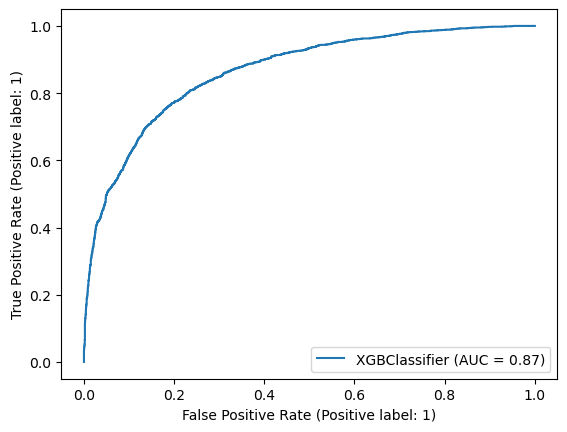

In [58]:


plot_roc_curve(seasonal_model, X_test_seas, y_test_seas)

In [59]:
#roc_auc_score(y_test, np.hstack((h1n1_predict, seas_predict)))

In [60]:
len(h1n1_predict)

5342

In [61]:
len(seas_predict)

5342

In [62]:
test = pd.read_csv('test_set_features.csv')

In [63]:
len(test.columns)#h1n1_probability = h1n1_model.predict_proba(test)

36

In [64]:
for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Unemployed")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'unemployed_occupation'

for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Unemployed")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'unemployed_in_industry'

for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Not in Labor Force")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'Not_in_laborforce'

for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Not in Labor Force")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'Not_in_laborforce'
 
for i, row in test[test['employment_industry'].isna()].iterrows():
    conditions = (test["employment_status"]=="Employed")
    if conditions.any():
        test.loc[i, 'employment_industry'] = 'other_industry'
 
for i, row in test[test['employment_occupation'].isna()].iterrows():
    conditions = (test["employment_status"]=="Employed")
    if conditions.any():
        test.loc[i, 'employment_occupation'] = 'other_occupation'
        
income_poverty_nan = 'refused_or_unknown'
marital_status_nan = 'refused_or_other_category'
employment_status_nan = 'refused_or_other_category'
rent_or_own_nan = 'other_refused'
education_nan = 'refused_or_unknown'


test['income_poverty'].fillna(income_poverty_nan, inplace=True)
test['marital_status'].fillna(marital_status_nan, inplace=True)
test['employment_status'].fillna(employment_status_nan, inplace=True)
test['rent_or_own'].fillna(rent_or_own_nan, inplace=True)
test['education'].fillna(education_nan, inplace=True)


In [65]:
test['overall_behaviour_of_respondent'] = test['behavioral_antiviral_meds'] + \
test['behavioral_avoidance'] + test['behavioral_face_mask'] + \
test['behavioral_wash_hands'] + test['behavioral_large_gatherings'] + \
test['behavioral_outside_home'] + test['behavioral_touch_face']

In [66]:
le = LabelEncoder()

for features in ordinal_columns:
    test[features] = le.fit_transform(test[features])

In [67]:
test = pd.get_dummies(test, columns=category_columns, drop_first=True)

In [68]:
numeric_columns = test.select_dtypes('number').columns

In [69]:
test.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_unemployed_occupation,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [73]:

test.drop(['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask',\
                    'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home',\
                    'behavioral_touch_face','respondent_id'], axis=1, inplace=True)

In [74]:
h1n1_probability = h1n1_model.predict_proba(test)

In [75]:
h1n1_probability = h1n1_probability[:,1].reshape(-1,1)

In [76]:
seasonal_probability = seasonal_model.predict_proba(test)

In [77]:
seasonal_probability = seasonal_probability[:,1].reshape(-1,1)

In [78]:
h1n1_probability

array([[0.11949857],
       [0.0419274 ],
       [0.2429618 ],
       ...,
       [0.15128934],
       [0.03185264],
       [0.58207715]], dtype=float32)

In [79]:
seasonal_probability

array([[0.21650426],
       [0.03609871],
       [0.67062676],
       ...,
       [0.16193426],
       [0.33487746],
       [0.58642155]], dtype=float32)

In [80]:
test_id = pd.read_csv("test_set_features.csv")

In [81]:
test_id.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [82]:
test_id.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [83]:
new_df = test_id.drop(['h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'], axis=1)

In [84]:
new_df["h1n1_vaccine"] = h1n1_probability
new_df["seasonal_vaccine"] = seasonal_probability

In [85]:
new_df.drop("h1n1_concern",axis=1,inplace=True)

new_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.119499,0.216504
1,26708,0.041927,0.036099
2,26709,0.242962,0.670627
3,26710,0.703075,0.867926
4,26711,0.328038,0.503588


In [86]:
new_df.set_index("respondent_id",inplace=True)

In [87]:
new_df.to_csv("submission_XGB_FeatureEnginnering_Behaviour_with_Drop.csv")